In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet
import pandas as pd



In [25]:
pd.set_option('display.max_columns',None)

In [ ]:
#data1 = pd.read_csv('train_data2.csv').drop('date',axis=1)
# Load data and drop date
train = pd.read_csv('train_data2.csv').drop('date', axis=1)
test = pd.read_csv('test_data.csv').drop('date', axis=1)

In [27]:
data1.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,55.20,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,66.610742,1.34,249.917800,250.160494,250.013500,295.096,306.4,250.249600,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772
1,55.20,16.98,3405.162222,621.878539,399.749344,9.892237,1.765064,66.789212,1.15,249.898294,250.111022,250.075383,295.096,306.4,249.942494,250.149878,550.599567,549.929139,549.089244,549.609700,549.220700,561.051644,551.090767
2,54.95,17.40,4707.070111,543.698178,400.406683,10.313013,1.773598,66.639781,1.50,250.195211,250.073311,250.118711,295.096,306.4,250.029300,250.029294,550.589033,550.093056,549.381589,551.306311,547.960394,554.877783,549.379322
3,55.99,17.16,5306.341500,523.790500,399.310583,10.366404,1.780677,67.295877,1.51,250.424350,249.787400,250.013850,295.096,306.4,250.038061,250.014317,549.050828,549.315661,550.353100,549.835628,551.320928,562.820106,550.319211
4,55.99,17.16,4423.358447,431.299856,399.261128,10.119028,1.693791,66.272664,1.47,250.003622,250.291344,250.027417,295.096,306.4,250.054944,250.129911,476.249289,485.581169,475.476228,416.271967,442.920122,467.027072,451.273711


In [28]:
data1.reset_index(drop = True, inplace= True)

In [29]:
train, test = train_test_split(data1,test_size= 0.2, random_state= 67)

In [14]:
#test = pd.read_csv('test_data.csv').drop('date', axis=1)


In [31]:

# Split features and target
X_train = train.drop('Amina Flow', axis=1)
y_train = train['Amina Flow']
X_test = test.drop('Amina Flow', axis=1)
y_test = test['Amina Flow']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

# Fit Elastic Net Regression
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)

# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Display coefficients with feature names
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'lasso_coef': lasso.coef_,
    'ridge_coef': ridge.coef_,
    'elasticnet_coef': elastic.coef_
   
})
print(coef_df)


                         feature  lasso_coef  ridge_coef  elasticnet_coef
0                    % Iron Feed   -0.000000  -23.647187        -3.376371
1                  % Silica Feed   -0.000000  -23.693417         0.854984
2                    Starch Flow    0.326289    3.509467         0.864026
3                  Ore Pulp Flow    2.376264    3.520275         1.055334
4                    Ore Pulp pH   -0.000000   -2.863938         0.000000
5               Ore Pulp Density   31.205298   31.388441        19.436794
6             % Iron Concentrate   -4.112161   -3.450957        -3.807907
7           % Silica Concentrate    5.407134    5.779631         4.306364
8   Flotation Column 01 Air Flow    0.000000  -10.923451         1.014873
9   Flotation Column 02 Air Flow    5.605330    4.716074         4.559732
10  Flotation Column 03 Air Flow    6.586792   22.682242         3.112717
11  Flotation Column 04 Air Flow    1.550652    6.001480         1.955676
12  Flotation Column 05 Air Flow   -9.

### as expected, ridge regression is the most explainable model and align with the domain knowledge. While elastic net 

In [32]:


# Predict on test set
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_elastic = elastic.predict(X_test_scaled)

# R² Score
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_elastic = r2_score(y_test, y_pred_elastic)

# MSE
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

# RMSE
rmse_lasso = np.sqrt(mse_lasso)
rmse_ridge = np.sqrt(mse_ridge)
rmse_elastic = np.sqrt(mse_elastic)

# MAE
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)

# Display results
results = pd.DataFrame({
    'Model': ['Lasso', 'Ridge', 'ElasticNet'],
    'R2': [r2_lasso, r2_ridge, r2_elastic],
    'MSE': [mse_lasso, mse_ridge, mse_elastic],
    'RMSE': [rmse_lasso, rmse_ridge, rmse_elastic],
    'MAE': [mae_lasso, mae_ridge, mae_elastic]
})
print(results)


        Model        R2          MSE       RMSE        MAE
0       Lasso  0.366642  2514.607222  50.145859  39.246983
1       Ridge  0.416493  2316.681918  48.131922  36.631782
2  ElasticNet  0.289655  2820.266666  53.106183  40.846506


                         feature  importance_mean  importance_std
5               Ore Pulp Density         0.378902        0.020469
3                  Ore Pulp Flow         0.239798        0.023715
0                    % Iron Feed         0.158789        0.012691
19     Flotation Column 05 Level         0.112196        0.010860
20     Flotation Column 06 Level         0.064050        0.010649
1                  % Silica Feed         0.049760        0.016917
14  Flotation Column 07 Air Flow         0.045940        0.009506
12  Flotation Column 05 Air Flow         0.045877        0.007933
13  Flotation Column 06 Air Flow         0.032687        0.002918
8   Flotation Column 01 Air Flow         0.032568        0.001806
21     Flotation Column 07 Level         0.031104        0.012322
6             % Iron Concentrate         0.028009        0.002723
2                    Starch Flow         0.015309        0.002710
4                    Ore Pulp pH         0.014367        0.003222
9   Flotat

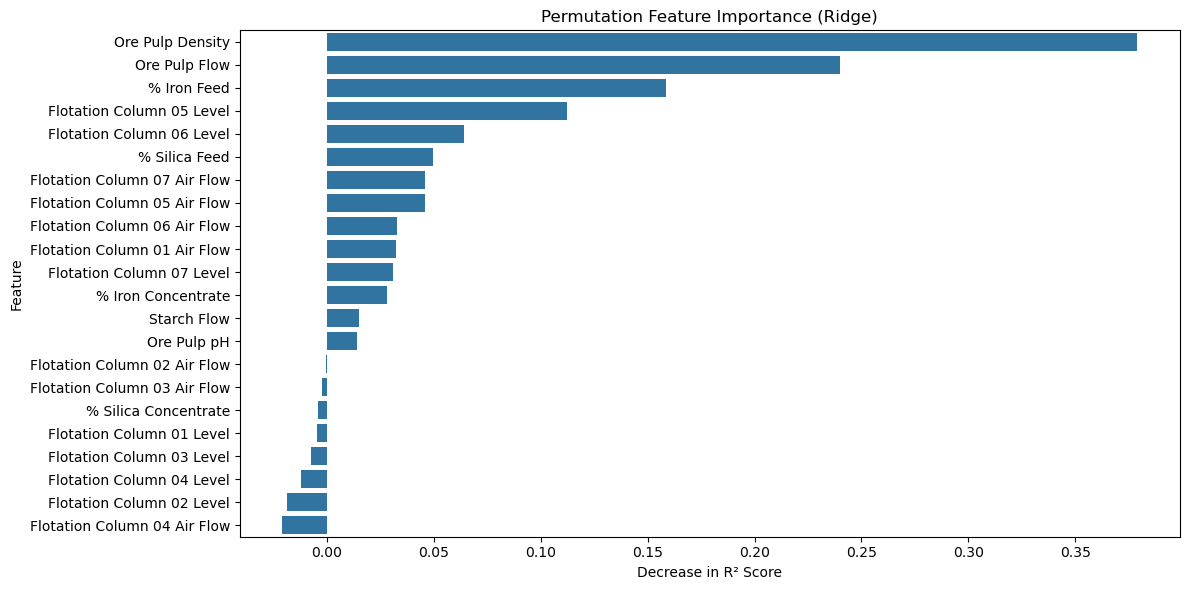

Selected features: ['Ore Pulp Density', 'Ore Pulp Flow', '% Iron Feed', 'Flotation Column 05 Level', 'Flotation Column 06 Level', '% Silica Feed', 'Flotation Column 07 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 01 Air Flow', 'Flotation Column 07 Level', '% Iron Concentrate', 'Starch Flow', 'Ore Pulp pH']


In [34]:


pd.set_option('display.max_columns', None)

# Load data and drop date
train = pd.read_csv('train_data2.csv').drop('date', axis=1)
test = pd.read_csv('test_data.csv').drop('date', axis=1)

# Split features and target
X_train = train.drop('Amina Flow', axis=1)
y_train = train['Amina Flow']
X_test = test.drop('Amina Flow', axis=1)
y_test = test['Amina Flow']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge Regression (most explainable in your domain)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Permutation Feature Importance (on test set)
perm_result = permutation_importance(ridge, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='r2')  # [1][2][6]

# Create DataFrame of importances
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance_mean': perm_result.importances_mean,
    'importance_std': perm_result.importances_std
}).sort_values('importance_mean', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance_mean', y='feature', data=feature_importance)
plt.title('Permutation Feature Importance (Ridge)')
plt.xlabel('Decrease in R² Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# If you want to select only the most important features (e.g., importance > 0.01)
selected_features = feature_importance[feature_importance['importance_mean'] > 0.001]['feature']
print("Selected features:", selected_features.tolist())

# You can now retrain your model using only these features if desired


In [41]:
train = pd.read_csv('train_data.csv').drop('date', axis=1)
test = pd.read_csv('test_data.csv').drop('date', axis=1)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# List of selected important features
important_features = [
    'Ore Pulp Density', 'Ore Pulp Flow', '% Iron Feed', 'Flotation Column 05 Level',
    'Flotation Column 06 Level', '% Silica Feed', 'Flotation Column 07 Air Flow',
    'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 01 Air Flow',
    'Flotation Column 07 Level', '% Iron Concentrate', 'Starch Flow', 'Ore Pulp pH'
]



# Filter only important features
X_train = train.drop('Amina Flow',axis=1)
y_train = train['Amina Flow']
X_test = test.drop('Amina Flow',axis=1)
y_test = test['Amina Flow']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test_scaled)
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))



In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and drop date
train = pd.read_csv('train_data.csv').drop('date', axis=1)
test = pd.read_csv('test_data.csv').drop('date', axis=1)

# Split features and target
X_train = train.drop('Amina Flow', axis=1)
y_train = train['Amina Flow']
X_test = test.drop('Amina Flow', axis=1)
y_test = test['Amina Flow']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test_scaled)
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Permutation importance (on test set)
perm_result_rf = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='r2')

# Prepare DataFrame for plotting
feature_names = X_train.columns
feature_importance_rf = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_result_rf.importances_mean,
    'importance_std': perm_result_rf.importances_std
}).sort_values('importance_mean', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance_mean', y='feature', data=feature_importance_rf)
plt.title('Permutation Feature Importance (Random Forest)')
plt.xlabel('Decrease in R² Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print feature importances in order
print(feature_importance_rf)
# If you want to select only the most important features (e.g., importance > 0.01)
selected_features = feature_importance[feature_importance['importance_mean'] > 0.001]['feature']
print("Selected features:", selected_features.tolist())


KeyboardInterrupt: 

In [ ]:
cm = train.corr()

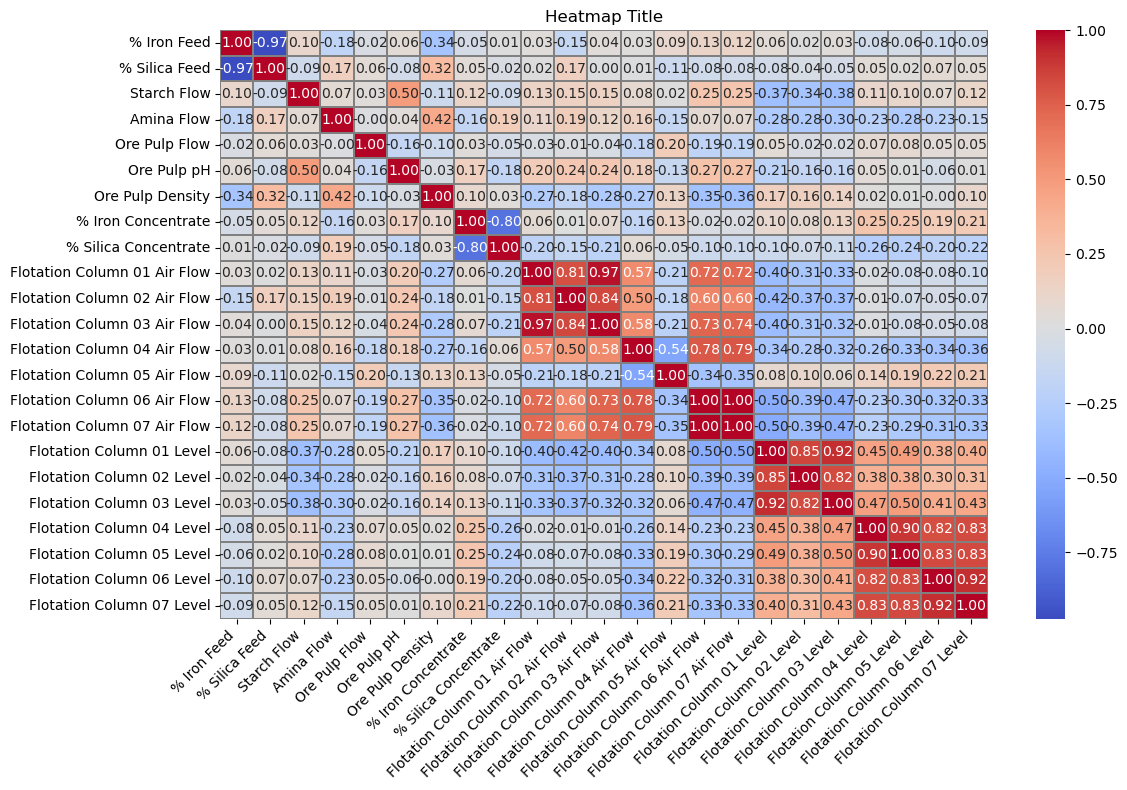

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    cm,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.1,
    linecolor='gray',
    cbar=True,
    square=False
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Heatmap Title')
plt.tight_layout()
plt.show()


#fc1 and fc2 have strong correlation